In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from ydata_profiling import ProfileReport

Read data from Excel Document

In [2]:
data = pd.read_excel('Price_Trend_1992_93_2015_USD.xls',skiprows=4,skipfooter=2).drop(labels=['Unnamed: 0','Unnamed: 9'],axis=1)

In [3]:
data

,MONTH,ROBUSTA KIBOKO,ROBUSTA FAQ,ARABICA PARCHMENT,EX.RATE Sh/Kg,ROBUSTA KIBOKO.1,ROBUSTA FAQ.1,ARABICA PARCHMENT.1
0,1992-07-01 00:00:00,210,420,499,1177.86,0.178289,0.356579,0.423650
1,1992-08-01 00:00:00,220,440,500,1185.29,0.185609,0.371217,0.421838
2,1992-09-01 00:00:00,215,400,502,1185.15,0.181412,0.337510,0.423575
3,1992-10-01 00:00:00,225,450,510,1181.07,0.190505,0.381010,0.431812
4,1992-11-01 00:00:00,250,500,550,1196.34,0.208971,0.417941,0.459736
...,...,...,...,...,...,...,...,...
274,2015-05-01 00:00:00,2200,4320,5600,3007.60,0.731480,1.436361,1.861950
275,2015-06-01 00:00:00,2250,4500,5750,3199.90,0.703147,1.406294,1.796931
276,2015-07-01 00:00:00,2200,4350,5850,3360.09,0.654744,1.294608,1.741025
277,2015-08-01 00:00:00,2200,4500,6250,3548.25,0.620024,1.268231,1.761432


In [4]:
data.dtypes

MONTH                   object
ROBUSTA KIBOKO           int64
ROBUSTA FAQ              int64
ARABICA PARCHMENT        int64
EX.RATE Sh/Kg          float64
ROBUSTA KIBOKO.1       float64
ROBUSTA FAQ.1          float64
ARABICA PARCHMENT.1    float64
dtype: object

Errors Faced when Reading Data Originally

In [5]:
sample = pd.read_excel('Price_Trend_1992_93_2015_USD.xls')

In [6]:
sample

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,AVERAGE PRICES PAID TO FARMERS AND PROCESSORS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,DEC 2013 IN UGANDA SHILLINGS PER KILOGRAM (U ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Shs,NaN,NaN,NaN,$,NaN,NaN,NaN
3,NaN,MONTH,ROBUSTA KIBOKO,ROBUSTA FAQ,ARABICA PARCHMENT,EX.RATE Sh/Kg,ROBUSTA KIBOKO,ROBUSTA FAQ,ARABICA PARCHMENT,NaN
4,NaN,1992-07-01 00:00:00,210,420,499,1177.86,0.178289,0.356579,0.42365,NaN
...,...,...,...,...,...,...,...,...,...,...
280,NaN,2015-07-01 00:00:00,2200,4350,5850,3360.09,0.654744,1.294608,1.741025,NaN
281,NaN,2015-08-01 00:00:00,2200,4500,6250,3548.25,0.620024,1.268231,1.761432,NaN
282,NaN,2015-09-01 00:00:00,2150,4250,5750,3667.5,0.58623,1.158828,1.567825,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating A Function to change MONTH column into datetime from string

In [7]:
format_str = "%b-%y"

def converting_datetime_to_string(a):
    if isinstance(a,str):
        a = datetime.strptime(a.strip(' '), format_str)
        return a
    else:
        return a

data['MONTH']=data['MONTH'].apply(converting_datetime_to_string)
data.dtypes

MONTH                  datetime64[ns]
ROBUSTA KIBOKO                  int64
ROBUSTA FAQ                     int64
ARABICA PARCHMENT               int64
EX.RATE Sh/Kg                 float64
ROBUSTA KIBOKO.1              float64
ROBUSTA FAQ.1                 float64
ARABICA PARCHMENT.1           float64
dtype: object

Carrying Out Multindexing

In [8]:
data =data.set_index('MONTH')

In [9]:
data2 = data.drop('EX.RATE Sh/Kg',axis=1)

In [10]:


index = pd.MultiIndex.from_arrays([['UGX','UGX','UGX','USD','USD','USD'],data.drop('EX.RATE Sh/Kg',axis=1).columns.to_list()])

In [11]:
data2.columns = index
data2['EX.RATE Sh/kg']=data['EX.RATE Sh/Kg']
data2

UGX                                            USD  \
           ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT ROBUSTA KIBOKO.1   
MONTH                                                                      
1992-07-01            210         420               499         0.178289   
1992-08-01            220         440               500         0.185609   
1992-09-01            215         400               502         0.181412   
1992-10-01            225         450               510         0.190505   
1992-11-01            250         500               550         0.208971   
...                   ...         ...               ...              ...   
2015-05-01           2200        4320              5600         0.731480   
2015-06-01           2250        4500              5750         0.703147   
2015-07-01           2200        4350              5850         0.654744   
2015-08-01           2200        4500              6250         0.620024   
2015-09-01           2150        4250              5750         0.586230   

                                             EX.RATE Sh/kg  
           ROBUSTA FAQ.1 ARABICA PARCHMENT.1                
MONTH                                                       
1992-07-01      0.356579            0.423650       1177.86  
1992-08-01      0.371217            0.421838       1185.29  
1992-09-01      0.337510            0.423575       1185.15  
1992-10-01      0.381010            0.431812       1181.07  
1992-11-01      0.417941            0.459736       1196.34  
...                  ...                 ...           ...  
2015-05-01      1.436361            1.861950       3007.60  
2015-06-01      1.406294            1.796931       3199.90  
2015-07-01      1.294608            1.741025       3360.09  
2015-08-01      1.268231            1.761432       3548.25  
2015-09-01      1.158828            1.567825       3667.50  

[279 rows x 7 columns]

Carrying OUT Simple Visualization

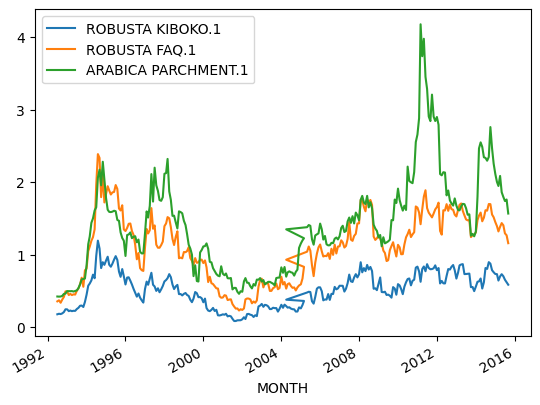

In [12]:
usdDf = data2["USD"]
usdDf.plot(kind="line");

In [13]:
data.drop('EX.RATE Sh/Kg',axis=1).columns.to_list()

['ROBUSTA KIBOKO',
 'ROBUSTA FAQ',
 'ARABICA PARCHMENT',
 'ROBUSTA KIBOKO.1',
 'ROBUSTA FAQ.1',
 'ARABICA PARCHMENT.1']